# PyTorch Workflow Fundamentals

In [1]:
what_were_covering = {1: "data (prepare and load)",
2: "build model",
3: "fitting the model to data (training)",
4: "making predictions and evaluating a model (inference)",
5: "saving and loading a model",
6: "putting it all together"
}


## Data (Prepare and Load)

In [10]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# know parameters but the model will predict it
weight = 0.7
bias = 0.3 

x = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weight * x + bias # linear regreation formula
print(x[:10]),print(y[:10]), len(x),len(y)

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


(None, None, 50, 50)

In [14]:
# split the data into testing(20%) and training (80%)
split = int(0.8 * len(x))

x_train, y_train = x[:split], y[:split]
x_test, y_test = x[split:], y[split:]

len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [81]:
# visualize

def plotGraph(x_data=x_train,
              x_label = y_train,
              test_data = x_test,
              test_label = y_test,
              prediction =None):
  # PLOT THE GRAPH
  plt.figure(figsize=(10,7))
  # TRAING
  plt.scatter(x_data, x_label, c='b', s=4, label="Train Data")
  # TEST
  plt.scatter(test_data, test_label, c='g', s=4, label="Test Data")

  #prediction
  if prediction is not None:
    plt.scatter(test_data, prediction, c="r", s=4, lable= "Predicted Y data")

  #show the legend
  plt.legend(prop={"size": 14})


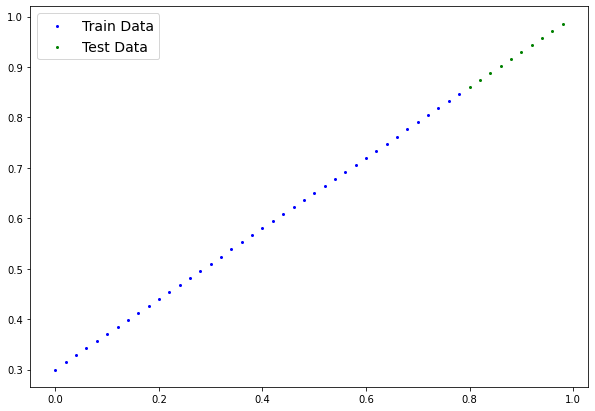

In [82]:
plotGraph();

## Build Model

In [102]:
# Build a linear Regression Model
class linearRegressionModel(nn.Module):
 def __init__(self):
   super().__init__()
   self.weight = nn.Parameter(torch.randn(1,
                                     dtype=float,
                                     requires_grad=True))
   self.bias =  nn.Parameter(torch.randn(1,
                                     dtype=float,
                                     requires_grad=True))
   
 def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias

In [103]:
# check the content of the model 
torch.manual_seed(42)
model_0 = linearRegressionModel()
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367], dtype=torch.float64)),
             ('bias', tensor([0.1288], dtype=torch.float64))])

### Making predictions using torch.inference_mode()

In [109]:
with torch.inference_mode():
  y_preeds = model_0(x_test)


y_preeds 


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], dtype=torch.float64)

AttributeError: ignored

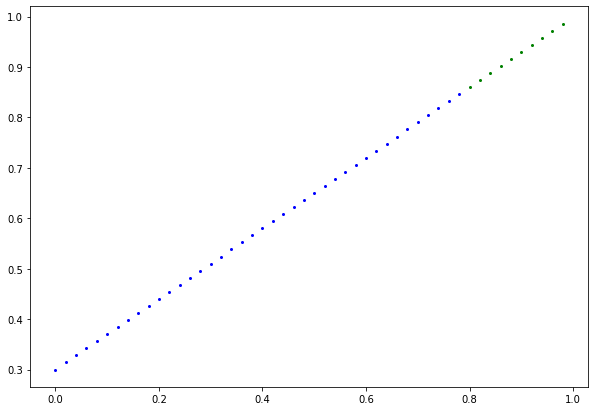

In [108]:
#plot the predicted values of y
plotGraph(prediction=y_preed)